In [58]:
import pandas as pd
import numpy as np

np.random.seed(1234)

data = {
    'CustomerID': range(1, 301),
    'Age': np.random.randint(20, 30, size=300),
    'Annual_Income': np.random.randint(30000, 100000, size=300)
}

df = pd.DataFrame(data)

df.head()

,CustomerID,Age,Annual_Income
0,1,23,31530
1,2,26,36903
2,3,25,74762
3,4,24,87555
4,5,28,35964


In [59]:
from sklearn.cluster import KMeans

X = df[['Age', 'Annual_Income']]

# init = 클러스터 중심(centroids)을 어떻게 초기화할지 지정하는 옵
# k-means++ : 초기 중심을 랜덤이 아니라, 서로 멀리 떨어지도록 선택하는 방식 (random보다 성능이 좋고 수렴이 빠름)
# random : 초기 중심을 훈련 데이터에서 무작위로 선택

# n_init = 초기 중심점 선택 횟수
# max_iter = 중심점 초기화 이후 수행하는 이터레이션 횟수
km = KMeans(n_init=30, n_clusters=2, random_state=1234)
km.fit(X)
df['cluster_2'] = km.predict(X)

df.tail()

,CustomerID,Age,Annual_Income,cluster_2
295,296,23,31876,0
296,297,23,39818,0
297,298,25,70877,1
298,299,24,35258,0
299,300,25,37576,0


In [60]:
# 군집의 중심
km.cluster_centers_

array([[2.45033557e+01, 4.64324094e+04],
       [2.43642384e+01, 8.23420993e+04]])

In [61]:
km = KMeans(n_init=30, n_clusters=3, random_state=1234)
km.fit(X)
df['cluster_3'] = km.predict(X)

df.tail()

,CustomerID,Age,Annual_Income,cluster_2,cluster_3
295,296,23,31876,0,1
296,297,23,39818,0,1
297,298,25,70877,1,0
298,299,24,35258,0,1
299,300,25,37576,0,1


In [62]:
km.cluster_centers_    

array([[2.42736842e+01, 6.69049263e+04],
       [2.45585586e+01, 4.16879459e+04],
       [2.44468085e+01, 8.90293191e+04]])

In [63]:
for k in [2, 3]:
    list_cent = []
    list_max_dist = []
    
    for i in range(k):
        cls = 'cluster_' + str(k)
        center = df.loc[df[cls] == i, ['Age', 'Annual_Income']].mean() # 군집의 중심
        list_cent.append(center)
        list_dist = []
        for j in df.loc[df[cls] == i, :].index:
            # 군집의 중심과 군집의 데이터들 간의 유클리드 거리
            num_dist = np.sqrt(((df.loc[j, ['Age', 'Annual_Income']] - center) ** 2).sum()) 
            # print("num_dist", num_dist)
            list_dist.append(num_dist)
        max_dist = np.max(list_dist)
        list_max_dist.append(max_dist)

    print(list_cent)

    list_min_dist = []
    for i in range(k):
        for j in range(i + 1, k):
            # 군집의 중심들 간의 유클리드 거리
            min_dist = np.sqrt(((list_cent[i] - list_cent[j]) ** 2).sum())
            print("min_dist", min_dist)
            list_min_dist.append(min_dist)
    
    goodness = np.min(list_min_dist) / np.max(list_max_dist)
    print("goodness", goodness)
    print()

[Age                 24.503356
Annual_Income    46432.409396
dtype: float64, Age                 24.364238
Annual_Income    82342.099338
dtype: float64]
min_dist 35909.689942044664
goodness 2.026553024277859

[Age                 24.273684
Annual_Income    66904.926316
dtype: float64, Age                 24.558559
Annual_Income    41687.945946
dtype: float64, Age                 24.446809
Annual_Income    89029.319149
dtype: float64]
min_dist 25216.98037145263
min_dist 22124.39283382404
min_dist 47341.37320312211
goodness 1.7804841919429824



In [64]:
####################################################################################################

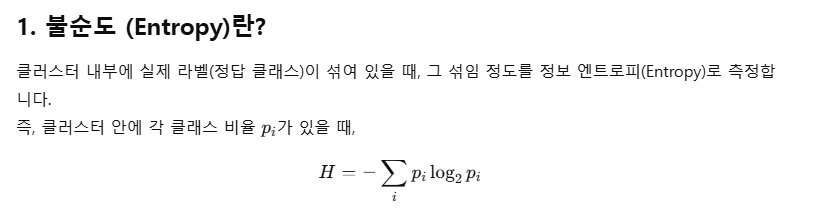

In [77]:
# cluster3에 대해 Age별 불순도 계산
for k in range(3):
    H = 0
    for age in df[df['cluster_3'] == k]['Age'].unique().tolist():
        count_age = df[(df['cluster_3'] == k) & (df['Age'] == age)]['Age'].count()
        count_tot = df[(df['cluster_3'] == k)]['Age'].count()
        p = count_age / count_tot
        print(k, age, p)
        H += (-p) * np.log2(p)
    
    print("H =", H)
    print()

0 25 0.08421052631578947
0 21 0.12631578947368421
0 20 0.09473684210526316
0 26 0.05263157894736842
0 27 0.10526315789473684
0 23 0.12631578947368421
0 29 0.10526315789473684
0 22 0.10526315789473684
0 24 0.11578947368421053
0 28 0.08421052631578947
H = 3.2868065961587742

1 23 0.0990990990990991
1 26 0.06306306306306306
1 28 0.07207207207207207
1 29 0.15315315315315314
1 27 0.0990990990990991
1 25 0.09009009009009009
1 22 0.11711711711711711
1 21 0.11711711711711711
1 24 0.10810810810810811
1 20 0.08108108108108109
H = 3.2788713888018512

2 24 0.09574468085106383
2 26 0.06382978723404255
2 28 0.11702127659574468
2 20 0.13829787234042554
2 29 0.1276595744680851
2 22 0.09574468085106383
2 23 0.07446808510638298
2 25 0.06382978723404255
2 27 0.10638297872340426
2 21 0.11702127659574468
H = 3.276059836864861



In [43]:
####################################################################################################

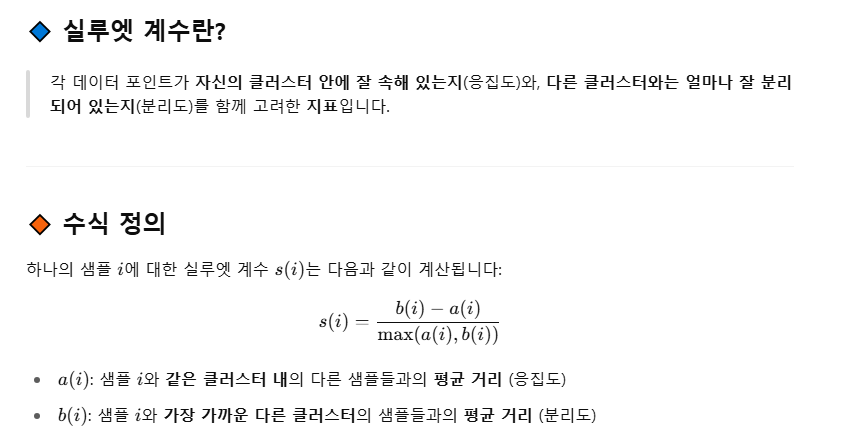

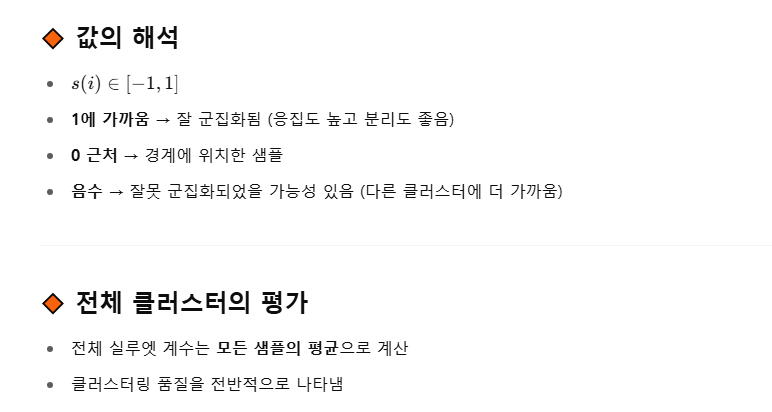

In [44]:
from sklearn.metrics import silhouette_score

for k in [2, 3]:
    cls = 'cluster_' + str(k)
    score = silhouette_score(X, df[cls])
    print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.722
Silhouette Score: 0.670


In [45]:
# 실루엣 계수 Example
# 샘플명   좌표 (x, y)     클러스터
# A       (0, 0)          0
# B       (1, 0)          0
# C       (5, 0)          1

In [2]:
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

X = np.array([[0, 0, 0], [1, 0, 0], [5, 0, 0], [6, 0, 0], [5, 5, 0], [6, 5, 0]])
labels = np.array([0, 0, 1, 1, 2, 2])

# 각 점별 실루엣 점수 확인
print("silhouette_samples:", silhouette_samples(X, labels))

# 전체 평균
print("silhouette_score:", silhouette_score(X, labels))

silhouette_samples: [0.81818182 0.77777778 0.77777778 0.80196097 0.80196097 0.80196097]
silhouette_score: 0.7966033820301107


In [3]:
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

X = np.array([[0, 0], [1, 0], [5, 0], [6, 0], [5, 5], [6, 5]])
labels = np.array([0, 0, 1, 1, 2, 2])

# 각 점별 실루엣 점수 확인
print("silhouette_samples:", silhouette_samples(X, labels))

# 전체 평균
print("silhouette_score:", silhouette_score(X, labels))

silhouette_samples: [0.81818182 0.77777778 0.77777778 0.80196097 0.80196097 0.80196097]
silhouette_score: 0.7966033820301107


In [47]:
import math

# 1. 데이터 정의 (샘플 좌표와 클러스터 라벨)
samples = {
    'A': {'coord': (0, 0), 'label': 2},
    'B': {'coord': (1, 0), 'label': 2},
    'C': {'coord': (5, 0), 'label': 1},
    'D': {'coord': (6, 0), 'label': 1},    
    'E': {'coord': (5, 5), 'label': 0},
    'F': {'coord': (6, 5), 'label': 0},        
}

# 2. 유클리드 거리 함수 정의
def euclidean(p1, p2):
    return math.sqrt(sum((a - b) ** 2 for a, b in zip(p1, p2)))

# 3. 실루엣 계수 계산 함수
def silhouette_score_manual(samples):
    scores = {}

    for name_i, info_i in samples.items():
        coord_i = info_i['coord']
        label_i = info_i['label']

        a_i = 0  # 같은 클러스터 거리 평균
        b_i = float('inf')  # 가장 가까운 다른 클러스터 거리 평균

        same_cluster_dists = []
        other_cluster_dists = {}

        for name_j, info_j in samples.items():
            if name_i == name_j:
                continue

            coord_j = info_j['coord']
            label_j = info_j['label']
            dist = euclidean(coord_i, coord_j)

            if label_j == label_i:
                same_cluster_dists.append(dist)
            else:
                other_cluster_dists.setdefault(label_j, []).append(dist)

        # a(i): 같은 클러스터 내 거리 평균
        if same_cluster_dists:
            a_i = sum(same_cluster_dists) / len(same_cluster_dists)
        else:
            a_i = 0  # 혼자 있는 경우

        # b(i): 가장 가까운 다른 클러스터와의 거리 평균
        for dists in other_cluster_dists.values():
            avg = sum(dists) / len(dists)
            b_i = min(b_i, avg)

        # s(i) 계산
        s_i = (b_i - a_i) / max(a_i, b_i) if max(a_i, b_i) > 0 else 0
        scores[name_i] = s_i

    # 평균 실루엣 점수
    avg_score = sum(scores.values()) / len(scores)
    return scores, avg_score

# 4. 실행
individual_scores, avg_score = silhouette_score_manual(samples)

# 5. 출력
for name, score in individual_scores.items():
    print(f"Sample {name}: Silhouette = {score:.3f}")
print(f"\nAverage Silhouette Score: {avg_score:.3f}")

Sample A: Silhouette = 0.818
Sample B: Silhouette = 0.778
Sample C: Silhouette = 0.778
Sample D: Silhouette = 0.802
Sample E: Silhouette = 0.802
Sample F: Silhouette = 0.802

Average Silhouette Score: 0.797
